## Import libraries

In [19]:
import random
import numpy as np
import pandas as pd
from typing import List
import matplotlib.pyplot as plt


In [ ]:
import tensorflow as tf
# split dataset

## Dataset

### Load dataset

In [7]:
from params import *
train_path = f"{BASE_DATASET_PATH}/train.csv"
df_train = pd.read_csv(train_path).sort_values(by=["participant_id", "sign", "sequence_id"]).reset_index(drop=True)
df_train

,path,participant_id,sequence_id,sign
0,train_landmark_files/2044/58302305.parquet,2044,58302305,TV
1,train_landmark_files/2044/331522207.parquet,2044,331522207,TV
2,train_landmark_files/2044/443474146.parquet,2044,443474146,TV
3,train_landmark_files/2044/621223126.parquet,2044,621223126,TV
4,train_landmark_files/2044/658246465.parquet,2044,658246465,TV
...,...,...,...,...
94472,train_landmark_files/62590/3112349392.parquet,62590,3112349392,zipper
94473,train_landmark_files/62590/3142175128.parquet,62590,3142175128,zipper
94474,train_landmark_files/62590/3271841292.parquet,62590,3271841292,zipper
94475,train_landmark_files/62590/3686972256.parquet,62590,3686972256,zipper


### Preprocess dataset

In [8]:
example_fn = df_train.query('sign == "listen"').path.values[0]
example_landmark = pd.read_parquet(f"{BASE_DATASET_PATH}/{example_fn}")
example_landmark.head()

,frame,row_id,type,landmark_index,x,y,z
0,19,19-face-0,face,0,0.494268,0.427109,-0.048232
1,19,19-face-1,face,1,0.489035,0.383361,-0.075116
2,19,19-face-2,face,2,0.488780,0.398298,-0.043157
3,19,19-face-3,face,3,0.477198,0.350322,-0.050643
4,19,19-face-4,face,4,0.488897,0.371743,-0.078244


In [9]:
# histogram of x and y values
example_landmark.describe().T

,count,mean,std,min,25%,50%,75%,max
frame,12489.0,30.000000,6.633515,19.000000,24.000000,30.000000,36.000000,41.000000
landmark_index,12489.0,202.994475,146.796096,0.000000,60.000000,196.000000,332.000000,467.000000
x,12006.0,0.486055,0.114971,0.015188,0.434032,0.491025,0.544033,1.157424
y,12006.0,0.430564,0.268545,0.230413,0.336717,0.385468,0.444194,2.526937
z,12006.0,-0.068241,0.383856,-3.742854,-0.037970,-0.010812,0.019466,1.248392


In [ ]:
def clean_sequences_landmarks_df(df):
    """Clean sequences landmarks dataframe."""
    # drop rows with NaN values on [x, y] columns
    df = df.dropna(subset=["x", "y"]).reset_index(drop=True)

    # normalize x and y values



    return df

def preprocess_sequences_landmarks_df(df):

    # clean dataframe
    df = clean_sequences_landmarks_df(df)

    # add column with sequence length



### Split dataset

In [12]:

df_train.groupby("participant_id").apply(lambda x: x.sample(frac=1-val_size, random_state=random_state))

NameError: name 'df' is not defined

In [30]:
def train_test_split(df, test_size=0.2, random_state=42):
    """Split dataset into train and validation set (as in sklearn)."""
    random.seed(random_state)
    df_train = df.sample(frac=1-test_size, random_state=random_state)
    df_val = df.drop(df_train.index)
    return df_train, df_val

def split_dataset(df, val_size=0.2, random_state=42, grouping_by : str = None):
    """Split dataset into train and validation set."""
    if grouping_by == "participant_id":
        participant_ids = df["participant_id"].unique()
        df_trains : List[pd.DataFrame] = []
        df_vals : List[pd.DataFrame] = []
        for participant_id in participant_ids:
            df_participant = df[df["participant_id"] == participant_id]
            df_train, df_val = train_test_split(df_participant, test_size=val_size, random_state=random_state)
            df_trains.append(df_train)
            df_vals.append(df_val)

        df_train = pd.concat(df_trains, ignore_index=True)
        df_val = pd.concat(df_vals, ignore_index=True)

    elif grouping_by == "sign":
        signs = df["sign"].unique()
        df_trains : List[pd.DataFrame] = []
        df_vals : List[pd.DataFrame] = []
        for sign in signs:
            df_sign = df[df["sign"] == sign]
            df_train, df_val = train_test_split(df_sign, test_size=val_size, random_state=random_state)
            df_trains.append(df_train)
            df_vals.append(df_val)

        df_train = pd.concat(df_trains, ignore_index=True)
        df_val = pd.concat(df_vals, ignore_index=True)
    else:
        df_train, df_val = train_test_split(df, test_size=val_size, random_state=random_state)
    return df_train, df_val

df_train, df_val = split_dataset(df_train, val_size=0.2, random_state=12, grouping_by_participant=True)

print(f"type of df_train: {type(df_train)}")
print(f"df_train.shape: {df_train.shape}")
#print(f"df_val.shape: {df_val.shape}")

df_train

type of df_train: <class 'pandas.core.frame.DataFrame'>
df_train.shape: (19812, 4)


,path,participant_id,sequence_id,sign
0,train_landmark_files/62590/2467088390.parquet,62590,2467088390,cute
1,train_landmark_files/62590/1235036391.parquet,62590,1235036391,green
2,train_landmark_files/62590/1243060783.parquet,62590,1243060783,drink
3,train_landmark_files/62590/2359884731.parquet,62590,2359884731,loud
4,train_landmark_files/62590/171888851.parquet,62590,171888851,farm
...,...,...,...,...
19807,train_landmark_files/30680/2464251381.parquet,30680,2464251381,lion
19808,train_landmark_files/30680/3960329206.parquet,30680,3960329206,thankyou
19809,train_landmark_files/30680/2062949535.parquet,30680,2062949535,helicopter
19810,train_landmark_files/30680/731017536.parquet,30680,731017536,shirt


<Axes: >

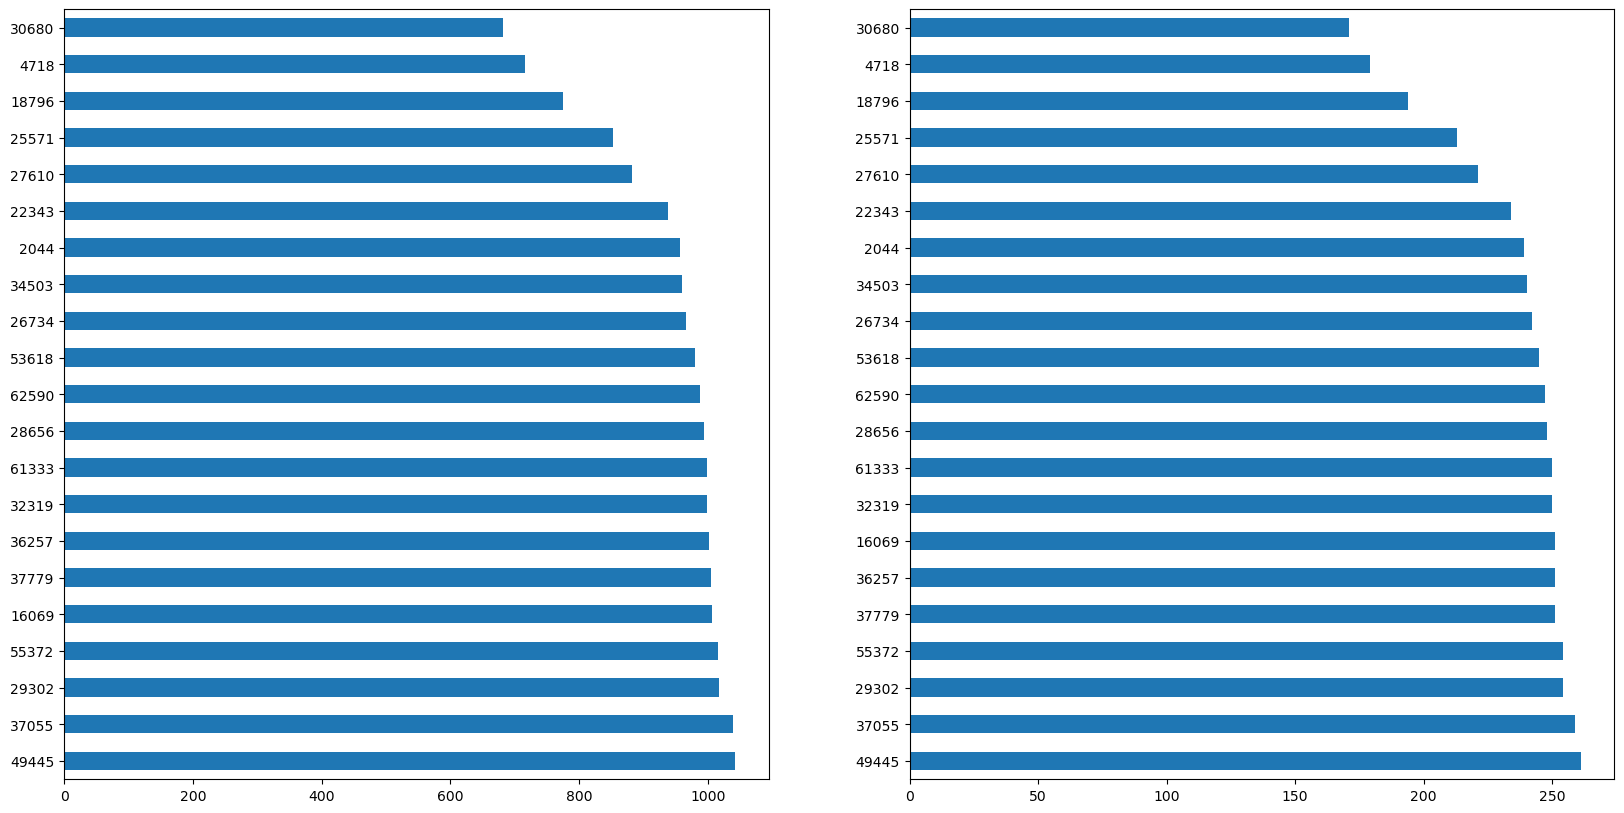

In [31]:
# participant distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))
df_train["participant_id"].value_counts().plot(kind="barh", ax=ax1)
df_val["participant_id"].value_counts().plot(kind="barh", ax=ax2)

## Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint, EarlyStopping